Normalize liqour data

In [1]:
# open all_beta_normalized_breast_liquid_oversample_random.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

liquid = pd.read_csv('all_beta_normalized_breast_liquid_oversample_random.csv')
# count column 0


liquid


,Unnamed: 0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.20,1.21
0,cg00000957,0.860452,0.861816,0.828862,0.854593,0.834130,0.825702,0.854593,0.861816,0.828862,...,0.863146,0.839264,0.838154,0.833727,0.820273,0.850236,0.853823,0.813853,0.829853,0.856274
1,cg00001349,0.651237,0.689401,0.717976,0.759530,0.650520,0.707983,0.759530,0.689401,0.717976,...,0.762429,0.711834,0.677838,0.607658,0.724661,0.587281,0.677297,0.781787,0.743716,0.770865
2,cg00001583,0.105578,0.145586,0.151494,0.154697,0.137455,0.114030,0.154697,0.145586,0.151494,...,0.129753,0.155541,0.100487,0.098573,0.131851,0.081984,0.130274,0.126544,0.149378,0.101541
3,cg00002028,0.089119,0.081822,0.091761,0.076214,0.092523,0.076705,0.076214,0.081822,0.091761,...,0.101627,0.104116,0.102976,0.077940,0.096559,0.058941,0.102959,0.086677,0.115429,0.086052
4,cg00002719,0.055126,0.066180,0.081197,0.060538,0.070888,0.081131,0.060538,0.066180,0.081197,...,0.042413,0.061513,0.046460,0.059188,0.080918,0.077113,0.069398,0.049803,0.052978,0.057628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410742,cg27656573,0.944012,0.943306,0.950748,0.956639,0.936954,0.935400,0.956639,0.943306,0.950748,...,0.952644,0.936031,0.944811,0.948703,0.946242,0.940713,0.941930,0.946173,0.939021,0.953477
410743,cg27657363,0.879266,0.900482,0.897924,0.912973,0.878780,0.903373,0.912973,0.900482,0.897924,...,0.878098,0.872009,0.884012,0.874592,0.874513,0.887568,0.905831,0.896101,0.872920,0.871998
410744,cg27657537,0.081713,0.098497,0.087162,0.137535,0.103004,0.140770,0.137535,0.098497,0.087162,...,0.077534,0.117473,0.137702,0.077860,0.118235,0.081581,0.183504,0.134606,0.111502,0.065309
410745,cg27662611,0.094778,0.085894,0.069684,0.076433,0.097572,0.117694,0.076433,0.085894,0.069684,...,0.066020,0.092328,0.089029,0.105949,0.082550,0.122752,0.067702,0.064762,0.061859,0.061657


In [2]:
# df["0"]~df["0.21"] as df0
liquid_normal = liquid.iloc[:, 1:23]
liquid_tumor = liquid.iloc[:, 23:45]
liquid_normal_avg = liquid_normal.mean(axis=1)
liquid_tumor_avg = liquid_tumor.mean(axis=1)
liquid_dBeta = liquid_tumor_avg - liquid_normal_avg
liquid_dBeta = pd.DataFrame(liquid_dBeta)
liquid_dBeta.insert(0, "name", liquid["Unnamed: 0"])
liquid_dBeta.insert(1, "liquid_normal_avg", liquid_normal_avg)
liquid_dBeta.insert(2, "liquid_tumor_avg", liquid_tumor_avg)
liquid_dBeta.columns = ["name", "liquid_normal_avg", "liquid_tumor_avg", "liquid_dBeta"]
liquid_dBeta

,name,liquid_normal_avg,liquid_tumor_avg,liquid_dBeta
0,cg00000957,0.844163,0.841403,-0.002760
1,cg00001349,0.710130,0.710737,0.000607
2,cg00001583,0.140394,0.121021,-0.019373
3,cg00002028,0.088206,0.099451,0.011245
4,cg00002719,0.067619,0.055787,-0.011832
...,...,...,...,...
410742,cg27656573,0.944007,0.940157,-0.003850
410743,cg27657363,0.891524,0.870099,-0.021425
410744,cg27657537,0.113256,0.105601,-0.007655
410745,cg27662611,0.084977,0.077050,-0.007927


tissue data

In [3]:
tissue = pd.read_csv('all_beta_normalized.csv')

In [4]:
tissue_normal = tissue.iloc[:,1:94:2]
tissue_tumor = tissue.iloc[:,94::2]
tissue_normal_avg = tissue_normal.mean(axis=1)
tissue_tumor_avg = tissue_tumor.mean(axis=1)
tissue_dBeta = tissue_tumor_avg - tissue_normal_avg
tissue_dBeta = pd.DataFrame(tissue_dBeta)
tissue_dBeta.insert(0, "name", tissue["Unnamed: 0"])
tissue_dBeta.insert(1, "tissue_normal_avg", tissue_normal_avg)
tissue_dBeta.insert(2, "tissue_tumor_avg", tissue_tumor_avg)

tissue_dBeta.columns = ["name", "tissue_normal_avg", "tissue_tumor_avg", "tissue_dBeta"]
tissue_dBeta

,name,tissue_normal_avg,tissue_tumor_avg,tissue_dBeta
0,cg00000957,0.843970,0.849482,0.005512
1,cg00001349,0.769853,0.782553,0.012700
2,cg00001583,0.106467,0.415738,0.309271
3,cg00002028,0.033562,0.046843,0.013281
4,cg00002837,0.389191,0.509628,0.120437
...,...,...,...,...
349415,cg27656573,0.956752,0.958200,0.001448
349416,cg27657363,0.946020,0.927455,-0.018564
349417,cg27657537,0.090105,0.184123,0.094018
349418,cg27662611,0.047211,0.052843,0.005632


In [5]:
# 交集liquid和tissue
result = pd.merge(liquid_dBeta, tissue_dBeta, on='name')
# 存檔
result.to_csv('liquid_tissue_dBeta.csv', index=False)
result

,name,liquid_normal_avg,liquid_tumor_avg,liquid_dBeta,tissue_normal_avg,tissue_tumor_avg,tissue_dBeta
0,cg00000957,0.844163,0.841403,-0.002760,0.843970,0.849482,0.005512
1,cg00001349,0.710130,0.710737,0.000607,0.769853,0.782553,0.012700
2,cg00001583,0.140394,0.121021,-0.019373,0.106467,0.415738,0.309271
3,cg00002028,0.088206,0.099451,0.011245,0.033562,0.046843,0.013281
4,cg00002837,0.423344,0.383663,-0.039680,0.389191,0.509628,0.120437
...,...,...,...,...,...,...,...
348825,cg27656573,0.944007,0.940157,-0.003850,0.956752,0.958200,0.001448
348826,cg27657363,0.891524,0.870099,-0.021425,0.946020,0.927455,-0.018564
348827,cg27657537,0.113256,0.105601,-0.007655,0.090105,0.184123,0.094018
348828,cg27662611,0.084977,0.077050,-0.007927,0.047211,0.052843,0.005632


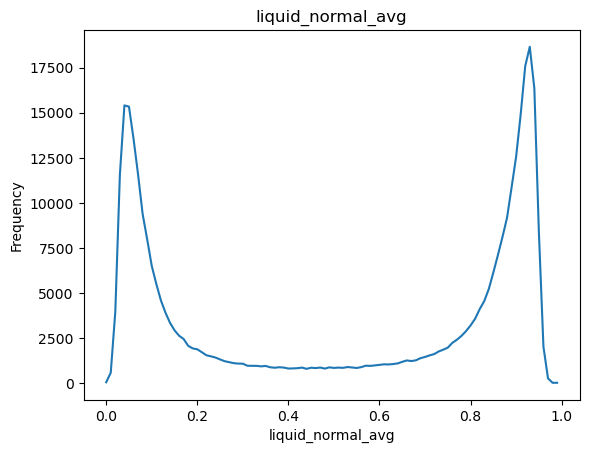

In [6]:
import numpy as np
import matplotlib.pyplot as plt

liquid_normal_avg = result["liquid_normal_avg"]

freq, bins = np.histogram(liquid_normal_avg, bins=100, range=(0, 1))

plt.plot(bins[:-1], freq, linestyle='-')
plt.xlabel('liquid_normal_avg')
plt.ylabel('Frequency')
plt.title('liquid_normal_avg')
plt.show()


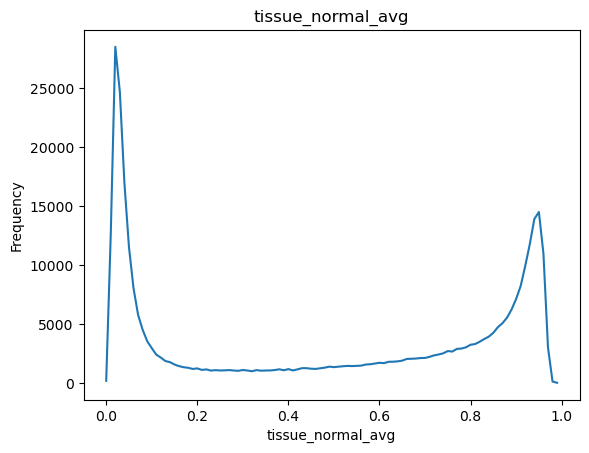

In [7]:
tissue_normal_avg = result["tissue_normal_avg"]

freq, bins = np.histogram(tissue_normal_avg, bins=100, range=(0, 1))

plt.plot(bins[:-1], freq, linestyle='-')
plt.xlabel('tissue_normal_avg')
plt.ylabel('Frequency')
plt.title('tissue_normal_avg')
plt.show()

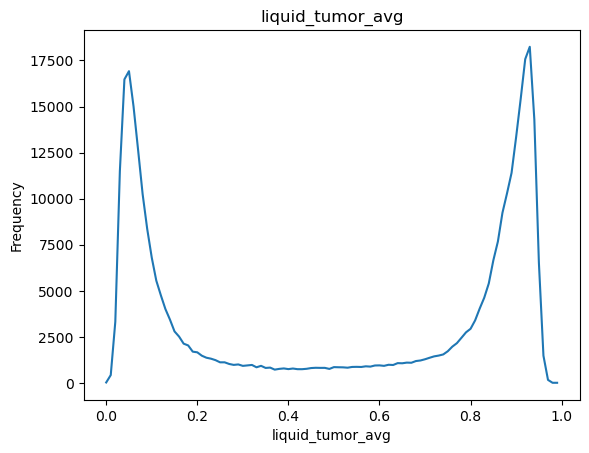

In [8]:
liquid_tumor_avg = result["liquid_tumor_avg"]

freq, bins = np.histogram(liquid_tumor_avg, bins=100, range=(0, 1))

plt.plot(bins[:-1], freq, linestyle='-')
plt.xlabel('liquid_tumor_avg')
plt.ylabel('Frequency')
plt.title('liquid_tumor_avg')
plt.show()

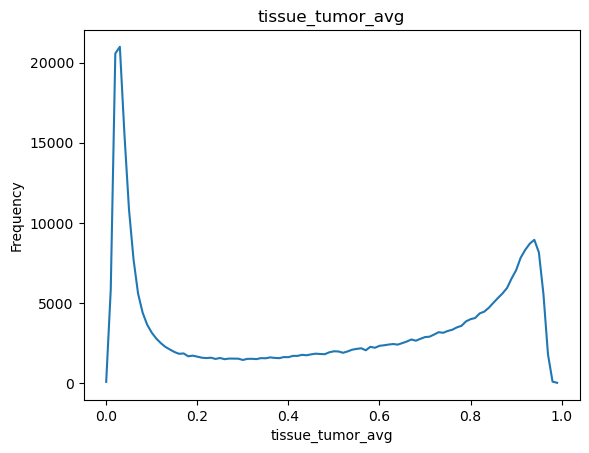

In [9]:
tissue_tumor_avg = result["tissue_tumor_avg"]

freq, bins = np.histogram(tissue_tumor_avg, bins=100, range=(0, 1))

plt.plot(bins[:-1], freq, linestyle='-')
plt.xlabel('tissue_tumor_avg')
plt.ylabel('Frequency')
plt.title('tissue_tumor_avg')
plt.show()

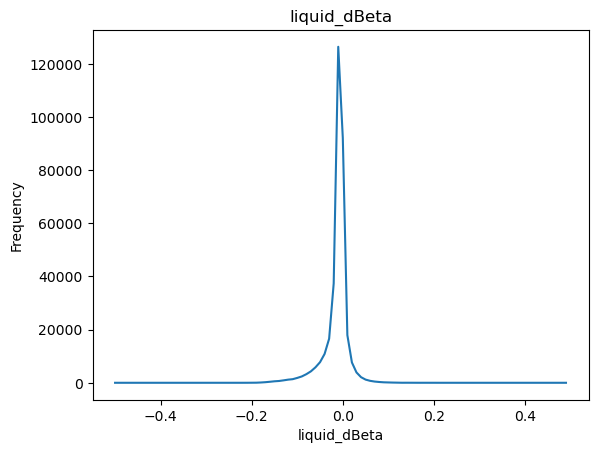

In [10]:
liquid_dBeta = result["liquid_dBeta"]

freq, bins = np.histogram(liquid_dBeta, bins=100, range=(-0.5, 0.5))

plt.plot(bins[:-1], freq, linestyle='-')
plt.xlabel('liquid_dBeta')
plt.ylabel('Frequency')
plt.title('liquid_dBeta')
plt.show()

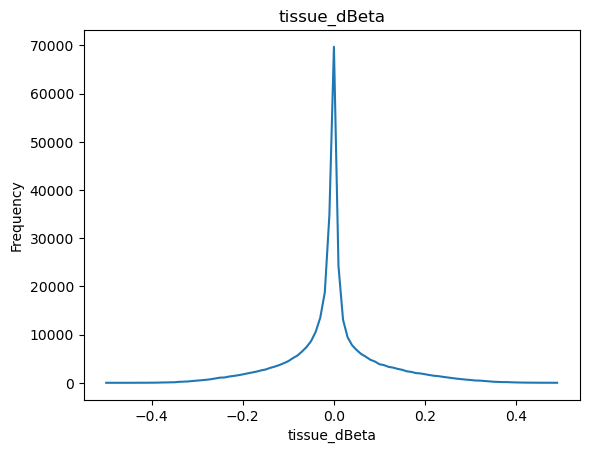

In [11]:
tissue_dBeta = result["tissue_dBeta"]

freq, bins = np.histogram(tissue_dBeta, bins=100, range=(-0.5, 0.5))

plt.plot(bins[:-1], freq, linestyle='-')
plt.xlabel('tissue_dBeta')
plt.ylabel('Frequency')
plt.title('tissue_dBeta')
plt.show()

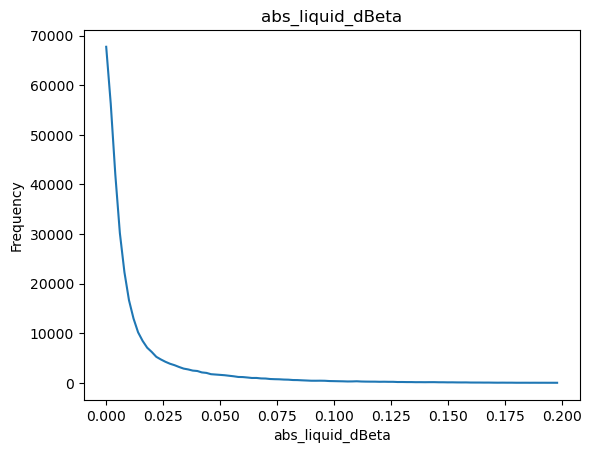

In [12]:
abs_liquid_dBeta = abs(result["liquid_dBeta"])

freq, bins = np.histogram(abs_liquid_dBeta, bins=100, range=(0, 0.2))

plt.plot(bins[:-1], freq, linestyle='-')
plt.xlabel('abs_liquid_dBeta')
plt.ylabel('Frequency')
plt.title('abs_liquid_dBeta')
plt.show()

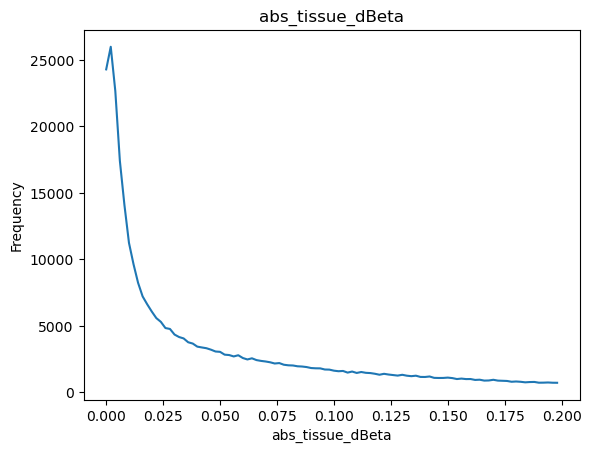

In [13]:
abs_tissue_dBeta = abs(tissue_dBeta)

freq, bins = np.histogram(abs_tissue_dBeta, bins=100, range=(0, 0.2))

plt.plot(bins[:-1], freq, linestyle='-')
plt.xlabel('abs_tissue_dBeta')
plt.ylabel('Frequency')
plt.title('abs_tissue_dBeta')
plt.show()